In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *

In [2]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

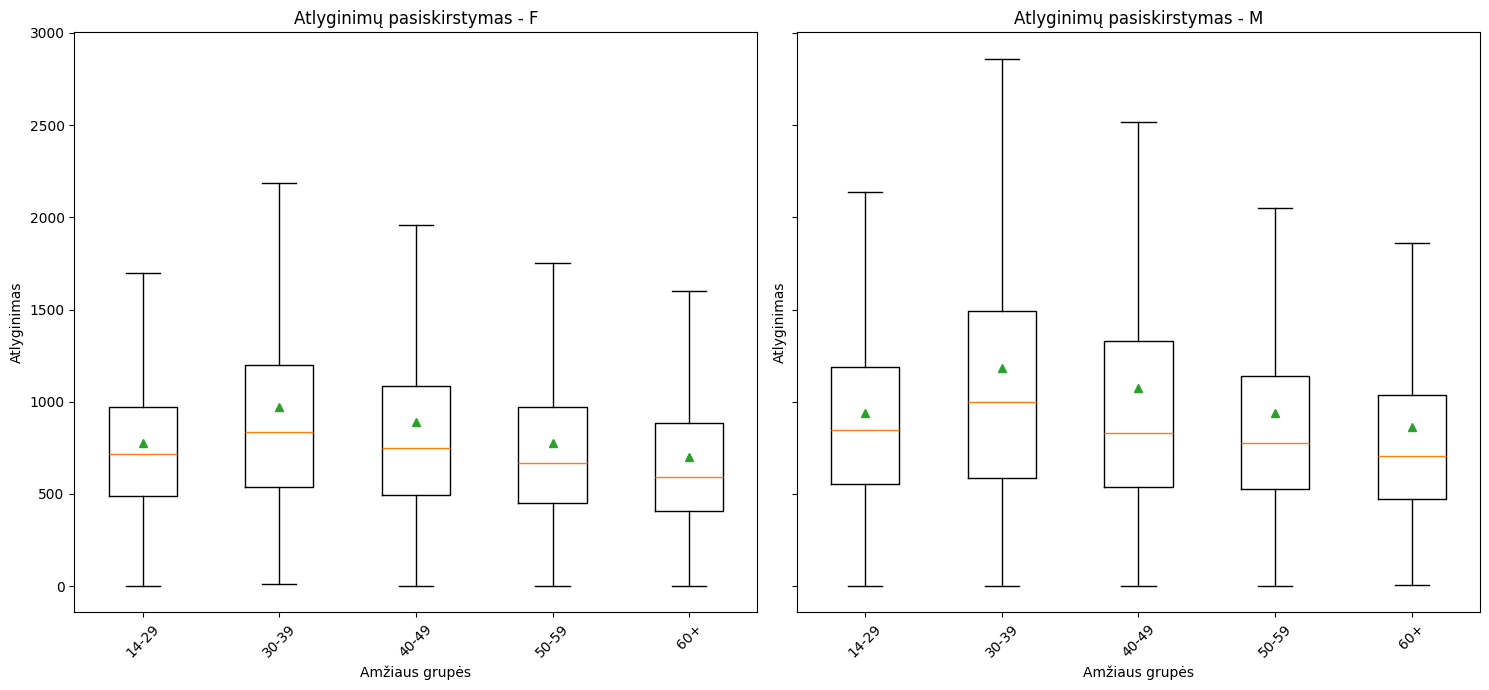

In [6]:
#parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
sql = """
SELECT
    lytis, amzius, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY amzius, lytis;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
lytis, amzius, bdusp = list(map(list, zip(*ans)))

bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)

# Unikalios amžiaus grupės ir lytis
amzius_grupes = sorted(set(amzius))
lytis_grupes = sorted(set(lytis))

# Boxplot:
fig, axes = plt.subplots(1, len(lytis_grupes), figsize=[15, 7], sharey=True)

# Kiekvienai lyčiai atskirai
for ax, lytys in zip(axes, lytis_grupes):
    duomenys = [bduspII[i] for i in range(len(amzius)) if lytis[i] == lytys]
    ax.boxplot(duomenys, showmeans=True, showfliers=False)
    ax.set_xticklabels(amzius_grupes, rotation=0)
    ax.set_title(f'Atlyginimų pasiskirstymas - {lytys}')
    ax.set_xlabel('Amžiaus grupės')
    ax.set_ylabel('Atlyginimas')

plt.tight_layout()
plt.show()

| 0 |       G1       |555,686,436,455,|
| 1 |       G2       |460,1487,1500,15|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,1072,1400,2|
[array([555., 686., 436., ..., 585., 933., 480.]), array([ 460., 1487., 1500., ...,  402.,  448.,  507.]), array([ 511.,  915.,  975., ..., 1953., 1990.,  462.]), array([1061., 1072., 1400., ...,  400.,  160., 3621.])]


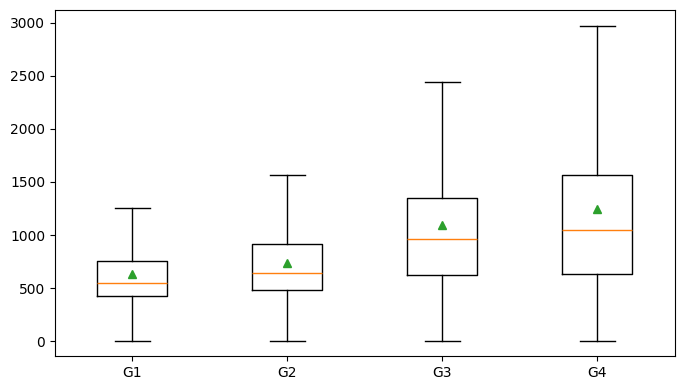

In [3]:
#Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)
sql="""SELECT
issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY issilavinimas;"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspII, showmeans=True, showfliers=False)

axis.set_xticklabels(issilavinimas)

plt.show()

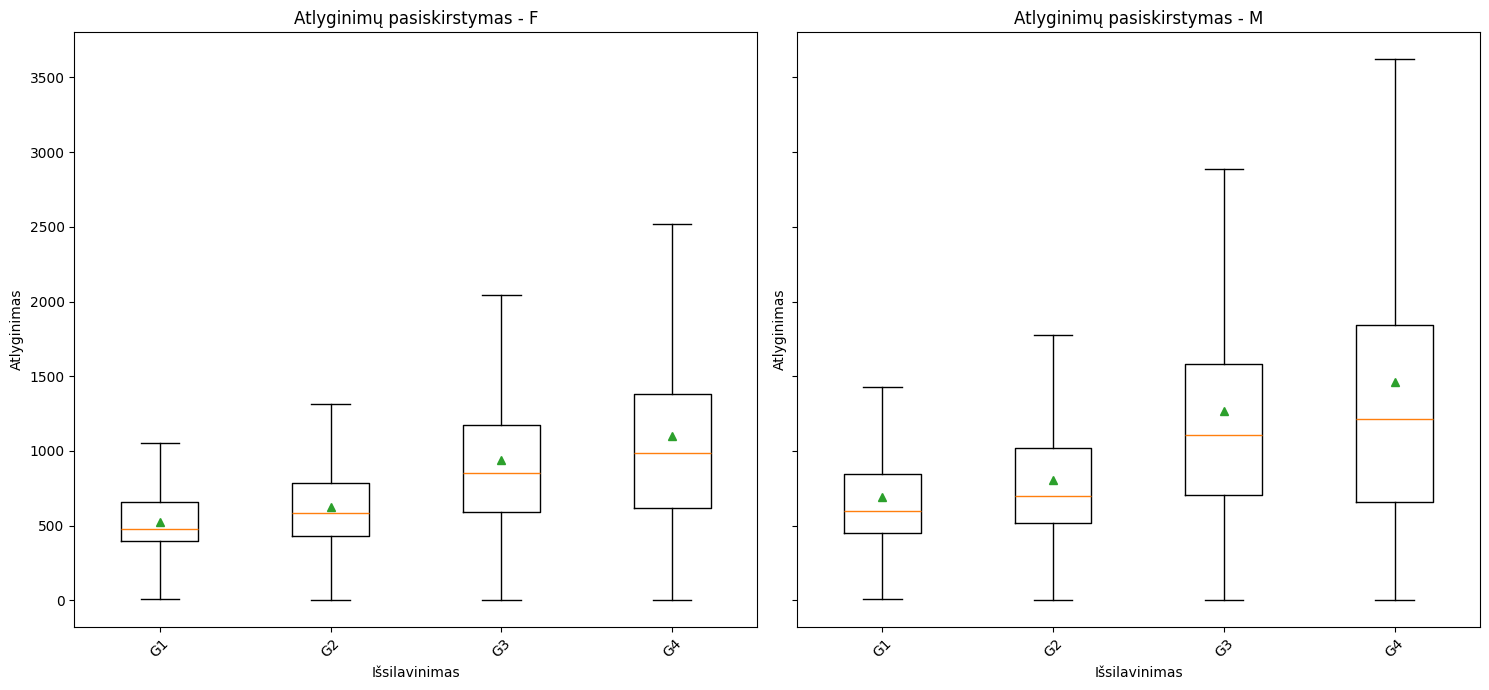

In [9]:
#Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams), MOterims ir vyrams
sql = """
SELECT
    lytis, issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY issilavinimas, lytis;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
lytis, issilavinimas, bdusp = list(map(list, zip(*ans)))

bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)

# Unikalios išsilavinimo grupės ir lytis
issilavinimas_grupes = sorted(set(issilavinimas), key=lambda x: issilavinimas.index(x))
lytis_grupes = sorted(set(lytis))

# Boxplot:
fig, axes = plt.subplots(1, len(lytis_grupes), figsize=[15, 7], sharey=True)

# Kiekvienai lyčiai atskirai
for ax, lytys in zip(axes, lytis_grupes):
    duomenys = [bduspII[i] for i in range(len(issilavinimas)) if lytis[i] == lytys]
    ax.boxplot(duomenys, showmeans=True, showfliers=False)
    ax.set_xticklabels(issilavinimas_grupes, rotation=45)
    ax.set_title(f'Atlyginimų pasiskirstymas - {lytys}')
    ax.set_xlabel('Išsilavinimas')
    ax.set_ylabel('Atlyginimas')

plt.tight_layout()
plt.show()

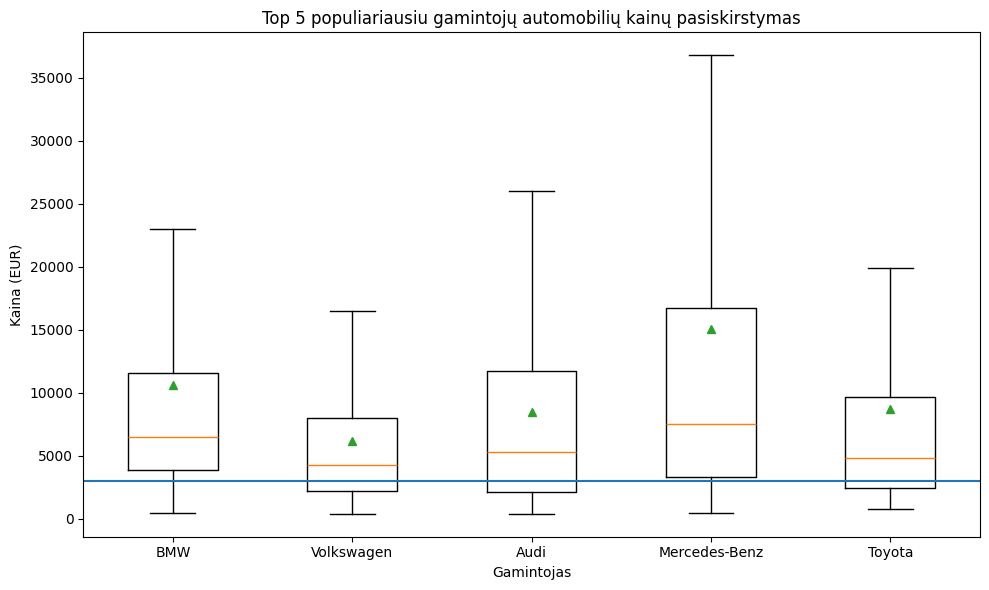

In [13]:
#Pateikite su boxplot'u  populiariausiu gamintoju kainų pasiskirtymą top 5 automobiliu
sql = """
SELECT
    gamintojas, GROUP_CONCAT(REPLACE(REPLACE(price, '€', ''), ' ', '')) AS GC
FROM autopliuslt 
GROUP BY gamintojas
ORDER BY Count(gamintojas) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojas, price = list(map(list, zip(*ans)))

Gamintojai_Top = []
for i in price:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai_Top.append(skaiciai)

# Boxplot:
fig, axis = plt.subplots(figsize=[10, 6])

axis.boxplot(Gamintojai_Top, showmeans=True, showfliers=False)

axis.set_xticklabels(gamintojas, rotation=0)
axis.set_xlabel('Gamintojas')
axis.set_ylabel('Kaina (EUR)')
axis.set_title('Top 5 populiariausiu gamintojų automobilių kainų pasiskirstymas')
axis.axhline(y=3000)

plt.tight_layout()
plt.show()

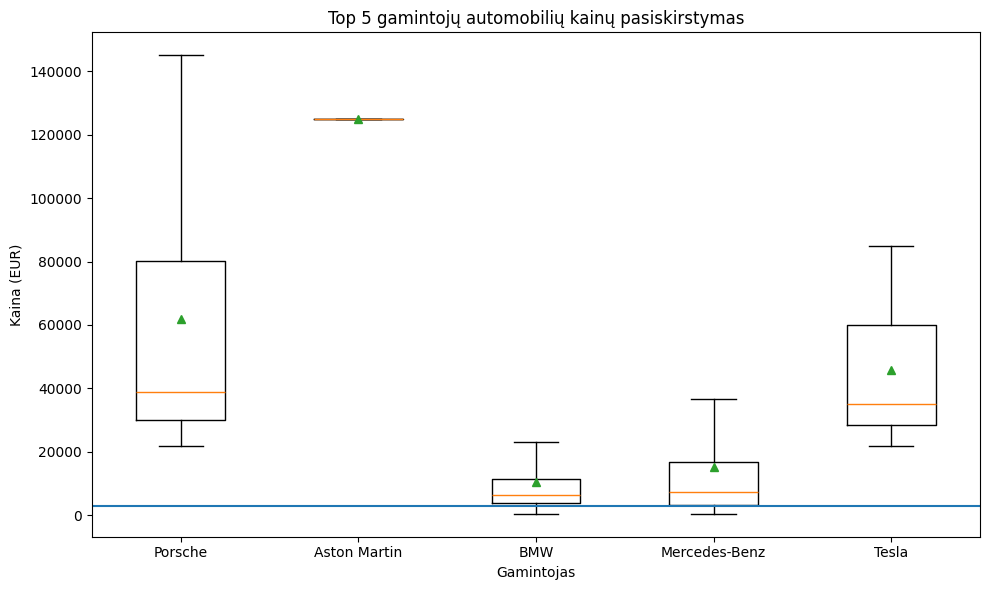

In [16]:
#Pateikite su boxplot'u 5 brangoiausiu gamintoju kainų pasiskirtymą top 1
sql = """
SELECT
    gamintojas, GROUP_CONCAT(REPLACE(REPLACE(price, '€', ''), ' ', '')) AS GC
FROM autopliuslt 
GROUP BY gamintojas
ORDER BY MAX(CAST(REPLACE(REPLACE(price, '€', ''), ' ', '') AS DECIMAL)) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojas, price = list(map(list, zip(*ans)))

Gamintojai_Top = []
for i in price:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai_Top.append(skaiciai)

# Boxplot:
fig, axis = plt.subplots(figsize=[10, 6])

axis.boxplot(Gamintojai_Top, showmeans=True, showfliers=False)

axis.set_xticklabels(gamintojas, rotation=0)
axis.set_xlabel('Gamintojas')
axis.set_ylabel('Kaina (EUR)')
axis.set_title('Top 5 gamintojų automobilių kainų pasiskirstymas')
axis.axhline(y=3000)

plt.tight_layout()
plt.show()